In [2]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from skimage.io import imshow
from matplotlib import pyplot as plt

In [3]:
faces_image = np.load('./data/olivetti-faces/olivetti_faces.npy')
faces_target = np.load('./data/olivetti-faces/olivetti_faces_target.npy')

In [4]:
print(faces_image.shape)

(400, 64, 64)


(302, 403, 3)


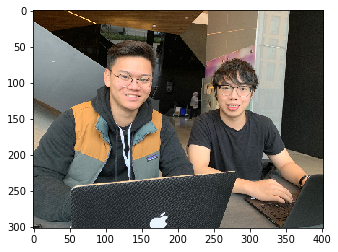

In [5]:
face_cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_eye.xml')
img = cv2.imread('./data/group_photo.jpg')
img = cv2.resize(img, (0,0), fx=0.10, fy=0.10) 
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

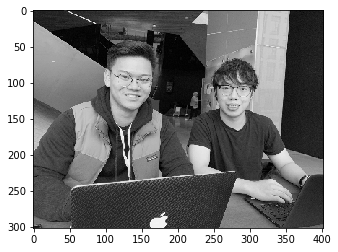

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Found 2 faces!


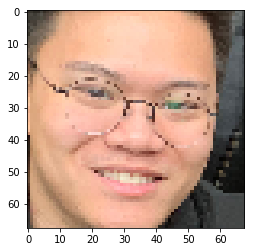

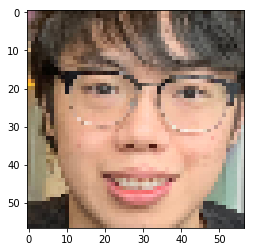

In [7]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print('Found {} faces!'.format(len(faces)))
for (x,y,w,h) in faces:
    plt.figure()
    plt.imshow(cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_BGR2RGB))
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         print('world')
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [56]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
  
# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
 
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

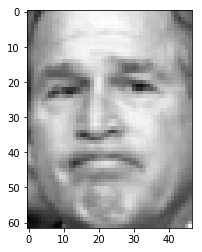

In [61]:
plt.imshow(X[0].reshape(h, w), cmap='gray')

In [37]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [50]:
# train a neural network
# print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=False, early_stopping=True).fit(X_train_pca, y_train)

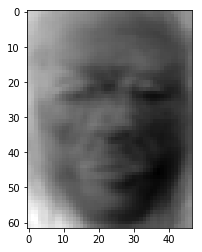

In [49]:
plt.imshow(pca.components_[0].reshape((h, w)), cmap='gray')

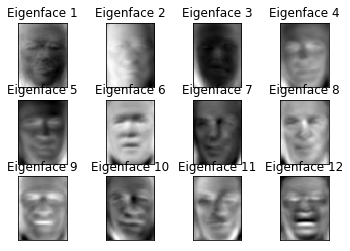

In [54]:
def plot_eigenfaces(components, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(components[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title('Eigenface {}'.format(i + 1))
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces(pca.components_, h, w)


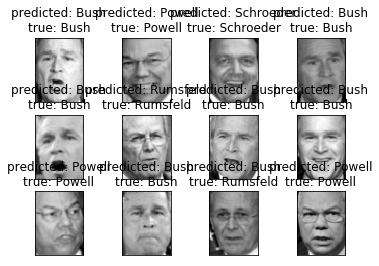

In [55]:
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)